## Image processing - basics

By going through this jupyter notebook and filling in the blanks you will learn how to assess **basic properties** of your image, perform **simple image operations** and assess the **image quality** quantitatively.

The example code and solutions were created by **André Lopes Marinho** and **Berit Zeller-Plumhoff**.

You will require the following libraries. If loading any of them fails, please use ``pip install`` to install any missing libraries.

In [1]:
# Importing libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import imageio as iio
import skimage
from PIL import Image

---
### Loading images and basic properties

The **first task** will be to write a function that will automatically **load and display an image** based on the ``image path`` that will be provided as an argument to the function. Please fill in the missing lines as indicated in the comments to load the image.

Once the image is loaded, we can assess its shape in a **second setp** using the ``.shape`` command and the type of the image using the ``.dtype`` command. Find out what values the commands returns based on different example images that are provided in the ``data`` folder.

After that, write a short function that prints the **image type**, **height**, **width** and **number of channels** for any given input image.

**Hint:**
- The images used for our lesson are named in the format: ``08_*.png``.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

In [2]:
# Ensure images display in the Jupyter notebook as static image, interactive widget or in a seperate window. [inline, widget, qt]
%matplotlib inline

In [3]:
def load_and_show_image(path):
    """
    Load and display an image from the given path.

    Args:
        path (str): The path to the image file, including the file extension.
                    Example: "images/example.tif"

    Returns:
        numpy.ndarray: The image data as a NumPy array.
    """
    # Use imageio to read the image
    image = iio.imread(path)

    # Display the image in grayscale using matplotlib
    plt.imshow(image, cmap="gray")
    plt.show()  # Ensure the image is displayed

    # Print a success message
    print(f"The image from {path} was loaded successfully.")

    return image


C:\Users\carst\AppData\Local\Temp\ipykernel_17972\1421545754.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = iio.imread(path)


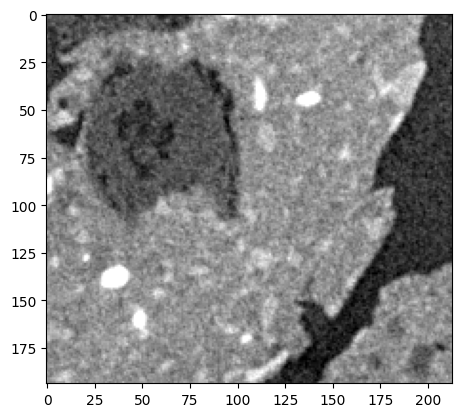

The image from data\08_soil_and_roots_8bit_2.png was loaded successfully.


In [81]:
img_01 = load_and_show_image(path=r"data\08_soil_and_roots_8bit_2.png")

In [86]:
def print_image_props(img):
    """
    Retrieves various properties of an image using the imageio library.

    Parameters:
    img (numpy.ndarray): image file.

    Returns:
    dict: A dictionary containing the following properties:
        - 'type': image type.
        - 'height': The height of the image in pixels.
        - 'width': The width of the image in pixels.
        - 'channels': The number of channels in the image (e.g., 3 for RGB, 4 for RGBA).
    """
    img.shape

    properties = {
        "type": img.dtype,
        "height": img.shape[0],
        "width": img.shape[1],
        "channels": img.shape[2] if len(img.shape) == 3 else 1,
    }
    # Remove None values from the dictionary
    properties = {k: v for k, v in properties.items() if v is not None}
    return properties


In [87]:
print_image_props(img_01)

{'type': dtype('uint8'), 'height': 194, 'width': 213, 'channels': 1}

---
### Histogram

**In addition** to assessing the general image properties, we are usually interested in knowing the **greyscale distribution**, i.e. the histogram, which gives us a first impression of image quality in terms of contrast and segmentability.

In this following code snipped complete the function to evaluate the histogram of an image that is input into the function as a ``numpy.ndarray``.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

In [83]:
def show_histogram(image):
    """Showns an histogram given an image. This method considers the image will be
        either grayscale or RGB

    Args:
        img(numpy.ndarray): Image represented by array

    Returns:
        None
    """

    # First, we need to know if the image is grayscale or RGB
    # use the shape function to do so
    image_shape = image.shape

    # Next, we can define some properties of our histogram figure
    # create an empty figure with title, xlabel, ylabel and set the limits of the x-axis
    plt.figure()
    plt.title("Histogram")
    plt.xlabel("Value")
    plt.ylabel("Pixel count")
    plt.xlim([0, np.max(image)])

    # Finally, create a histrogram using the numpy histogram function and plot it
    # use a bin number of 256 in all cases
    if len(image_shape) > 2:
        colors = ("red", "green", "blue")
        for channel_id, color in enumerate(colors):
            histogram, bin_edges = np.histogram(
                image[:, :, channel_id],
                bins=256,
                range=(0, np.max(image[:, :, channel_id])),
            )
            plt.plot(bin_edges[0:-1], histogram, color=color)
    else:
        histogram, bin_edges = np.histogram(image, bins=256, range=(0, np.max(image)))
        plt.plot(bin_edges[0:-1], histogram)

    return None

Now load a couple of test images and display their histogram using the functions you have adapted.

In [ ]:
# Show a histogram
show_histogram(image=img_01)

---
### Simple image operations #1

Once we are able to load an image and assess its properties as well as its histogram, we can perform a number of matrix operations on it.
As shown as an example in the lecture, perform the **following operation** for the image $A$: $$A_{new}=\frac{A}{4}+100$$
and similarly, as shown in the lecture perform the operation: $$A_{new}=A*2$$
Use both the ``08_bone_16bit.png`` image and the ``08_soil_and_roots_8bit.png`` image as input. Comment on how the image operation has changed the original image in both cases.

**Hint:** Make sure that the matrix dimensions fit.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

In [ ]:
img = load_and_show_image(path="data/08_soil_and_roots_8bit.png")

# print the properties of the initial image and show its histogram
show_histogram(image=img)
# print the properties of the initial image
print_image_props(img)

In [ ]:
# perform the operation
img_new = (img / 10) + 100 * np.ones((img.shape))

# show the image and print the properties and show the histogram
plt.imshow(img_new, cmap="gray")
print_image_props(img_new)
show_histogram(image=img_new)

In [ ]:
# perform the operation
img_new = img * 2

# show the image and print the properties and show the histogram
plt.imshow(img_new, cmap="gray")
print_image_props(img_new)
show_histogram(image=img_new)

---
### Simple image operations #2

**In addition** to adding or multiplying an image with scalars, we can **add/subtract/multiply/divide images**. This is a task performed often for example during the **flat** and **dark field correction**  [Link](https://en.wikipedia.org/wiki/Flat-field_correction) of **X-Ray** projections prior to the 3D reconstruction of images.

In the **next task**, please perform this correction of the projection ``08_proj.png`` in the data folder. In the same folder you will find the corresponding ``08_dark.png`` and ``08_flat.png`` image. Compare how the histogram of the projection changes due to the correction and comment on this based on what you observe qualitatively in the image.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

In [ ]:
# flat and dark fiel corrections
# load required images

flat = load_and_show_image(path="data/08_flat.tiff")
dark = load_and_show_image(path="data/08_dark.tiff")
proj = load_and_show_image(path="data/08_proj.tiff")

In [ ]:
# perform correction operation and display the result
proj_corr = (proj - dark) / (flat - dark)
plt.imshow(proj_corr, cmap="gray")
plt.show()

In [ ]:
# show the histogram of the original and the corrected projection
show_histogram(image=proj)
show_histogram(image=proj_corr)

---
### Image quality #1

In addition to assessing the image histogram, we want to assess the image quality quantitatively. We can do so by calculating the **signal-to-noise ratio (SNR)** and **contrast-to-noise ratio (CNR)** for different regions of our image. In the following, you need to add missing code to two functions which will compuate **SNR** and **CNR** following the input of two image regions, respectively. We choose the following definitions of **SNR** and **CNR**: $$SNR = \frac{S_i}{0.5\sqrt{\sigma_i^2+\sigma_{bg}^2}}$$ and $$CNR = \frac{|S_i-S_j|}{0.5\sqrt{\sigma_i^2+\sigma_j^2}}$$
where $S_i$ and $S_j$ are the mean greyscale values of the regions $i$ and $j$. The respective $\sigma$ values correspond to the standard deviation of the greyscale values of the regions $i$ and $j$. For the **SNR** we attain the overall noise by taking into account the background noise too.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

In [15]:
def get_signal_to_noise_ratio(region_i, region_bg):
    """Calculates Signal-to-Noise Ratio (SNR) by the following expression:

                SNR = |mean(region_i)| / 0.5*[sqrt(stdev(region_i)^2 + stdev(region_bg)^2)]

    Args:
        region_i(numpy.ndarray): Array slice defining region i
        region_bg(numpy.ndarray): Array slice defining background region
    Returns:
        double: SNR value
    """

    # calculate the mean value of region_i
    a = np.mean(region_i)
    # calculate the denominator of the SNR
    b = 0.5 * math.sqrt(np.std(region_i) ** 2 + np.std(region_bg) ** 2)

    # compute and return the SNR
    SNR = a / b

    return SNR


def get_contrast_to_noise_ratio(region_i, region_j):
    """Calculates Contrast-to-Noise Ratio (CNR) by the following expression:

                CNR = |mean(region_i) - mean(region_j)| / 0.5*[sqrt(stdev(region_i)^2 + stdev(region_j)^2)]

    Args:
        region_i(numpy.ndarray): Array slice defining region i
        region_bg(numpy.ndarray): Array slice defining region j
    Returns:
        double: CNR value
    """

    # calculate the numerator of the CNR
    a = abs(np.mean(region_i) - np.mean(region_j))
    # calculate the denominator of the CNR
    b = 0.5 * math.sqrt(np.std(region_i) ** 2 + np.std(region_j) ** 2)

    # compute and return the CNR
    CNR = a / b

    return CNR

Based on the functions you have just created please calculate both **SNR** and **CNR** between the four quadrants of the image ``08_SNR_CNR.tif`` in the data folder. Overall, you should create four or six comparisons for **SNR** and **CNR**, respectively.

**Hints:** 
- To calculate the SNR you may assume that the darkest image quadrant is the background.
- In order to use the functions you must identify the regions within the image. Identify the image dimensions to do so.

In [ ]:
# load and display the image

SNRCNR = load_and_show_image(path="data/08_SNR_CNR.tif")

# print image properties
print_image_props(SNRCNR)

In [17]:
# define four regions based on the image and its dimensions
q1 = SNRCNR[10:20, 0:10]
q2 = SNRCNR[10:20, 10:20]
q3 = SNRCNR[0:10, 10:20]
q4 = SNRCNR[0:10, 0:10]

In [ ]:
# calculate all SNR and CNR
SNR1 = get_signal_to_noise_ratio(q1, q1)
SNR2 = get_signal_to_noise_ratio(q2, q1)
SNR3 = get_signal_to_noise_ratio(q3, q1)
SNR4 = get_signal_to_noise_ratio(q4, q1)

CNR12 = get_contrast_to_noise_ratio(q1, q2)
CNR13 = get_contrast_to_noise_ratio(q1, q3)
CNR14 = get_contrast_to_noise_ratio(q1, q4)
CNR23 = get_contrast_to_noise_ratio(q2, q3)
CNR24 = get_contrast_to_noise_ratio(q2, q4)
CNR34 = get_contrast_to_noise_ratio(q3, q4)

# print the computed values
print("SNR of Q1:", np.round(SNR1, 2))
print("SNR of Q2:", np.round(SNR2, 2))
print("SNR of Q3:", np.round(SNR3, 2))
print("SNR of Q4:", np.round(SNR4, 2))

print("CNR of Q1 vs Q2:", np.round(CNR12, 2))
print("CNR of Q1 vs Q3:", np.round(CNR13, 2))
print("CNR of Q1 vs Q4:", np.round(CNR14, 2))
print("CNR of Q2 vs Q3:", np.round(CNR23, 2))
print("CNR of Q2 vs Q4:", np.round(CNR24, 2))
print("CNR of Q3 vs Q4:", np.round(CNR34, 2))

Please comment on the values that you have obtained:
- ...

---
### Image quality #2

In the **next task**, use image ``08_soil_and_roots_8bit_2.png`` and calculate the **CNR** for **root vs. soil**, **root vs. background** and **soil vs. background**. Please comment on why you are selecting specific regions and comment on your results.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

In [ ]:
earth = load_and_show_image(path="data/08_soil_and_roots_8bit_2.png")

print_image_props(earth)

In [ ]:
# Select different regions from the image and calculate SNR and CNR values
# Regions
air = earth[75:100, 185:210]
soil = earth[75:100, 110:135]
root = earth[55:75, 70:90]

# Visualizing them on the image
img_aux = earth.copy()
row_air, col_air = skimage.draw.rectangle_perimeter(start=(75, 185), end=(100, 210))
row_soil, col_soil = skimage.draw.rectangle_perimeter(start=(75, 110), end=(100, 135))
row_root, col_root = skimage.draw.rectangle_perimeter(start=(55, 70), end=(75, 90))

# For better vizualization
fig, ax = plt.subplots()
ax.imshow(img_aux, cmap="gray")
ax.plot(col_air, row_air, "-r")
ax.plot(col_soil, row_soil, "-g")
ax.plot(col_root, row_root, "-b")

# Calculate CNR
# CNR - Soil and Root
CNR1 = get_contrast_to_noise_ratio(soil, root)
print("CNR soil vs. root: ", np.round(CNR1, 2))

# CNR - Soil and Air
CNR2 = get_contrast_to_noise_ratio(soil, air)
print("CNR soil vs. air: ", np.round(CNR2, 2))

# CNR - Air and Root
CNR3 = get_contrast_to_noise_ratio(air, root)
print("CNR air vs. root: ", np.round(CNR3, 2))

---